In [1]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt
import copy
import math
import time
from pathlib import Path
import scipy.io
import cmath

import cvxpy as cp

%matplotlib inline

# Study of expansiveness for EG

## $\ell = 1$

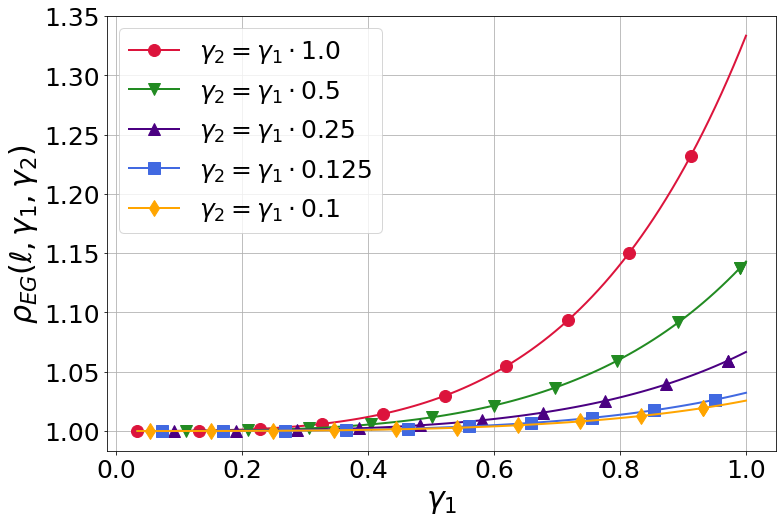

In [4]:
ell = 1.0
beta = 1.0/ell

fig = plt.figure(figsize=(12,8))
# plt.title(r"Expansiveness parameter for EG, $\ell = 1$", fontsize=30)

exp_coeffs = np.zeros((5,100))

gamma1_options = np.linspace(beta/30, beta, 100)
gamma2_coeff_options = np.array([1.0, 1.0/2, 1.0/4, 1.0/8, 1.0/10])

for idx1, gamma1 in enumerate(gamma1_options):
    for idx2, gamma2 in enumerate(gamma1*gamma2_coeff_options):
        gamma1_str = '%.6f' % gamma1
        gamma2_str = '%.6f' % gamma2
        res = scipy.io.loadmat('dump/EG_expansiveness_1_'+gamma1_str+"_"+gamma2_str+'.mat')
        exp_coeffs[idx2][idx1] = res['res_norm'][0][0]

        
markers = ["o", "v", "^", "s", "d"]
colors = ["crimson", "forestgreen", "indigo","royalblue", "orange"]
for idx2, gamma2_coeff in enumerate(gamma2_coeff_options):
    plt.plot(gamma1_options[0:], exp_coeffs[idx2][0:], linewidth=2, markersize = 12, marker = markers[idx2],
             markevery=range(-idx2*int(100/(10*5)), 100, 10), color=colors[idx2],
             label=r'$\gamma_2 = \gamma_1 \cdot $'+str(gamma2_coeff))
    
plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$\rho_{EG}(\ell,\gamma_1,\gamma_2)$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

plt.savefig("plot/EG_expansivness_ell_"+str(ell)+".pdf", bbox_inches='tight')

## $\ell = 10$

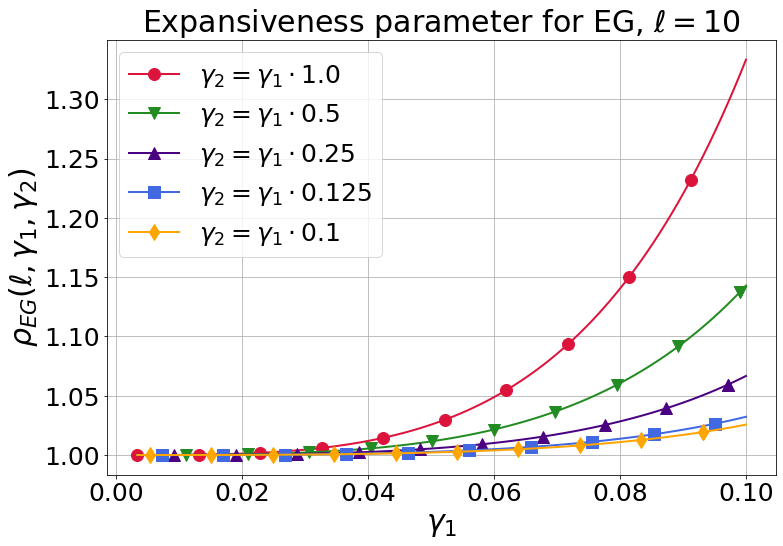

In [6]:
ell = 10.0
beta = 1.0/ell

fig = plt.figure(figsize=(12,8))
plt.title(r"Expansiveness parameter for EG, $\ell = 10$", fontsize=30)

exp_coeffs = np.zeros((5,100))

gamma1_options = np.linspace(beta/30, beta, 100)
gamma2_coeff_options = np.array([1.0, 1.0/2, 1.0/4, 1.0/8, 1.0/10])

for idx1, gamma1 in enumerate(gamma1_options):
    for idx2, gamma2 in enumerate(gamma1*gamma2_coeff_options):
        gamma1_str = '%.6f' % gamma1
        gamma2_str = '%.6f' % gamma2
        res = scipy.io.loadmat('dump/EG_expansiveness_1e-1_'+gamma1_str+"_"+gamma2_str+'.mat')
        exp_coeffs[idx2][idx1] = res['res_norm'][0][0]

markers = ["o", "v", "^", "s", "d"]
colors = ["crimson", "forestgreen", "indigo","royalblue", "orange"]
for idx2, gamma2_coeff in enumerate(gamma2_coeff_options):
    plt.plot(gamma1_options[0:], exp_coeffs[idx2][0:], linewidth=2, markersize = 12, marker = markers[idx2],
             markevery=range(-idx2*int(100/(10*5)), 100, 10), color=colors[idx2],
             label=r'$\gamma_2 = \gamma_1 \cdot $'+str(gamma2_coeff))
    
plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$\rho_{EG}(\ell,\gamma_1,\gamma_2)$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

plt.savefig("plot/EG_expansivness_ell_"+str(ell)+".pdf", bbox_inches='tight')

## $\ell = 10^{-1}$

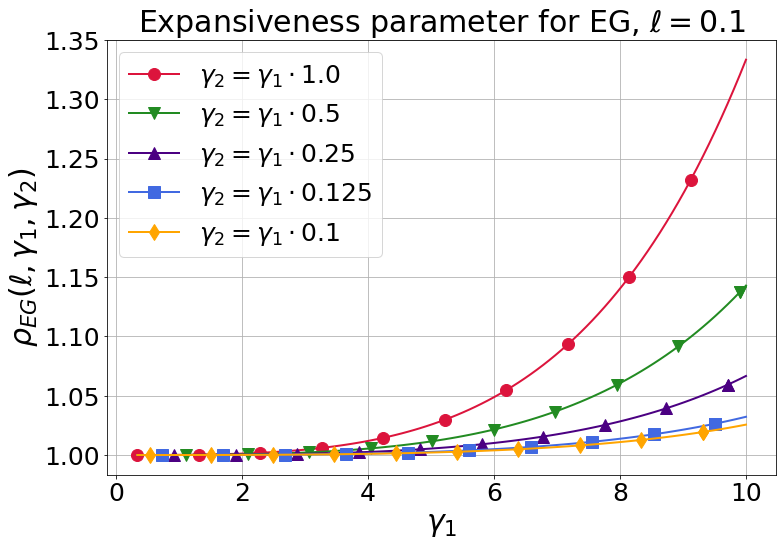

In [12]:
ell = 0.1
beta = 1.0/ell

fig = plt.figure(figsize=(12,8))
plt.title(r"Expansiveness parameter for EG, $\ell = 0.1$", fontsize=30)

exp_coeffs = np.zeros((5,100))

gamma1_options = np.linspace(beta/30, beta, 100)
gamma2_coeff_options = np.array([1.0, 1.0/2, 1.0/4, 1.0/8, 1.0/10])

for idx1, gamma1 in enumerate(gamma1_options):
    for idx2, gamma2 in enumerate(gamma1*gamma2_coeff_options):
        gamma1_str = '%.6f' % gamma1
        gamma2_str = '%.6f' % gamma2
        res = scipy.io.loadmat('dump/EG_expansiveness_1e+1_'+gamma1_str+"_"+gamma2_str+'.mat')
        exp_coeffs[idx2][idx1] = res['res_norm'][0][0]

markers = ["o", "v", "^", "s", "d"]
colors = ["crimson", "forestgreen", "indigo","royalblue", "orange"]
for idx2, gamma2_coeff in enumerate(gamma2_coeff_options):
    plt.plot(gamma1_options[0:], exp_coeffs[idx2][0:], linewidth=2, markersize = 12, marker = markers[idx2],
             markevery=range(-idx2*int(100/(10*5)), 100, 10), color=colors[idx2],
             label=r'$\gamma_2 = \gamma_1 \cdot $'+str(gamma2_coeff))
    
plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$\rho_{EG}(\ell,\gamma_1,\gamma_2)$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

plt.savefig("plot/EG_expansivness_ell_"+str(ell)+".pdf", bbox_inches='tight')

# EG: SDP for proving expansiveness via log-det heuristic

In [2]:
ell = 1.0
gamma1 = 0.5/ell
gamma2 = copy.copy(gamma1)

# Matrices for SDP
M0 = 1.0*np.array([[1, -1, 0, 0, -gamma2, gamma2], 
                   [-1, 1, 0, 0, gamma2, -gamma2],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [-gamma2, gamma2, 0, 0, gamma2**2, -(gamma2**2)],
                   [gamma2, -gamma2, 0, 0, -(gamma2**2), gamma2**2]])

M1 = 1.0*np.array([[0, 0, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, ell*gamma1 - 1, 0, 1-ell*gamma1/2, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 1-ell*gamma1/2, 0, -1, 0],
                   [0, 0, 0, 0, 0, 0]])

M2 = 1.0*np.array([[0, 0, ell/2, -ell/2, 0, 0], 
                   [0, 0, -ell/2, ell/2, 0, 0],
                   [ell/2, -ell/2, -1, 1, 0, 0],
                   [-ell/2, ell/2, 1, -1, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0]])

M3 = 1.0*np.array([[0, 0, ell/2, 0, 0, -ell/2], 
                   [0, 0, -ell/2, 0, 0, ell/2],
                   [ell/2, -ell/2, -1, ell*gamma1/2, 0, 1],
                   [0, 0, ell*gamma1/2, 0, 0, -ell*gamma1/2],
                   [0, 0, 0, 0, 0, 0],
                   [-ell/2, ell/2, 1, -ell*gamma1/2, 0, -1]])

M4 = 1.0*np.array([[0, 0, 0, -ell/2, ell/2, 0], 
                   [0, 0, 0, ell/2, -ell/2, 0],
                   [0, 0, 0, ell*gamma1/2, -ell*gamma1/2, 0],
                   [-ell/2, ell/2, ell*gamma1/2, -1, 1, 0],
                   [ell/2, -ell/2, -ell*gamma1/2, 1, -1, 0],
                   [0, 0, 0, 0, 0, 0]])

M5 = 1.0*np.array([[0, 0, 0, 0, ell/2, -ell/2], 
                   [0, 0, 0, 0, -ell/2, ell/2],
                   [0, 0, 0, 0, -ell*gamma1/2, ell*gamma1/2],
                   [0, 0, 0, 0, ell*gamma1/2, -ell*gamma1/2],
                   [ell/2, -ell/2, -ell*gamma1/2, ell*gamma1/2, -1, 1],
                   [-ell/2, ell/2, ell*gamma1/2, -ell*gamma1/2, 1, -1]])

M6 = 1.0*np.array([[0, 0, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, ell*gamma1 - 1, 0, 1-ell*gamma1/2],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1-ell*gamma1/2, 0, -1]])

M7 = 1.0*np.array([[1, -1, 0, 0, 0, 0], 
                   [-1, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0]])

In [3]:
%%time

X = np.eye(6)
delta = 2e-5

for i in range(100):
    G = cp.Variable((6,6), symmetric=True)

    constraints = [G >> 0]
    constraints += [cp.trace(M0 @ G) >= 1.0005]
    constraints += [cp.trace(M1 @ G) >= 0]
    constraints += [cp.trace(M2 @ G) >= 0]
    constraints += [cp.trace(M3 @ G) >= 0]
    constraints += [cp.trace(M4 @ G) >= 0]
    constraints += [cp.trace(M5 @ G) >= 0]
    constraints += [cp.trace(M6 @ G) >= 0]
    constraints += [cp.trace(M7 @ G) == 1]
    
    Temp_matr = np.linalg.inv(X + delta*np.eye(6))

#     print(Temp_matr)
    prob = cp.Problem(cp.Minimize(cp.trace(Temp_matr @ G)),
                  constraints)

    prob.solve()
    
    X = copy.copy(G.value)

Wall time: 2.45 s


In [4]:
print(X)

[[ 0.25       -0.25        0.01223576  0.00710541  0.00796254  0.00816681]
 [-0.25        0.25       -0.01223576 -0.00710541 -0.00796254 -0.00816681]
 [ 0.01223576 -0.01223576  0.01460692  0.02391556  0.01446028  0.01220694]
 [ 0.00710541 -0.00710541  0.02391556  0.03985347  0.02389926  0.02009713]
 [ 0.00796254 -0.00796254  0.01446028  0.02389926  0.01438696  0.01212003]
 [ 0.00816681 -0.00816681  0.01220694  0.02009713  0.01212003  0.01021896]]


In [5]:
eigvals, eigenvect = np.linalg.eig(X)

In [6]:
D = np.diag(eigvals)
print("Eignvalues:")
print(D[0][0])
print(D[1][1])
print(D[2][2])
print(D[3][3])
print(D[4][4])
print(D[5][5])
D[2][2] = 0
D[3][3] = 0
D[4][4] = 0
D[5][5] = 0

Eignvalues:
0.5015230499028802
0.07754325433079876
-6.752546353200845e-11
-1.8154352347507634e-11
2.122983812475403e-11
5.3851499323986115e-11


In [7]:
S = np.dot(eigenvect,np.sqrt(D))

In [8]:
np.dot(S, S.T) - X

array([[ 3.37610218e-11,  3.37642692e-11,  2.27099589e-13,
         1.91591534e-14, -1.87861879e-13, -8.37524494e-14],
       [ 3.37642692e-11,  3.37613826e-11, -2.27049282e-13,
        -1.91556840e-14,  1.87879226e-13,  8.37732661e-14],
       [ 2.27099589e-13, -2.27049282e-13, -2.18940491e-11,
         6.35963504e-12, -3.96727790e-13,  1.37536232e-11],
       [ 1.91591534e-14, -1.91556840e-14,  6.35963504e-12,
         4.61515548e-12, -9.41683190e-12, -5.53517301e-12],
       [-1.87861879e-13,  1.87879226e-13, -3.96727790e-13,
        -9.41683190e-12, -4.71709130e-12,  2.48883969e-11],
       [-8.37524494e-14,  8.37732661e-14,  1.37536232e-11,
        -5.53517301e-12,  2.48883969e-11, -3.49280761e-11]])

In [9]:
S

array([[-0.49988096, -0.01090971,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49988096,  0.01090971,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.02704815,  0.11779353,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.01855228,  0.19876941,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.01851527,  0.11850798,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.01850645,  0.09938045,  0.        ,  0.        ,  0.        ,
         0.        ]])

## Let us visualize the 2-D solution for different $\gamma$

In [10]:
%%time
ell = 0.99
ell1 = 1.0
beta = 1.0/ell1

N = 10

x_1st_component = np.zeros(N)
x_2nd_component = np.zeros(N)

y_1st_component = np.zeros(N)
y_2nd_component = np.zeros(N)

tx_1st_component = np.zeros(N)
tx_2nd_component = np.zeros(N)

ty_1st_component = np.zeros(N)
ty_2nd_component = np.zeros(N)

xF1_1st_component = np.zeros(N)
xF1_2nd_component = np.zeros(N)

yF1_1st_component = np.zeros(N)
yF1_2nd_component = np.zeros(N)

xF2_1st_component = np.zeros(N)
xF2_2nd_component = np.zeros(N)

yF2_1st_component = np.zeros(N)
yF2_2nd_component = np.zeros(N)


x_1st_component_rotated = np.zeros(N)
x_2nd_component_rotated = np.zeros(N)

y_1st_component_rotated = np.zeros(N)
y_2nd_component_rotated = np.zeros(N)

tx_1st_component_rotated = np.zeros(N)
tx_2nd_component_rotated = np.zeros(N)

ty_1st_component_rotated = np.zeros(N)
ty_2nd_component_rotated = np.zeros(N)

xF1_1st_component_rotated = np.zeros(N)
xF1_2nd_component_rotated = np.zeros(N)

yF1_1st_component_rotated = np.zeros(N)
yF1_2nd_component_rotated = np.zeros(N)

xF2_1st_component_rotated = np.zeros(N)
xF2_2nd_component_rotated = np.zeros(N)

yF2_1st_component_rotated = np.zeros(N)
yF2_2nd_component_rotated = np.zeros(N)

gamma1_options = np.linspace(0.4*beta, 0.5*beta, N)
gamma2_coeff_options = np.array([1.0])

for idx1, gamma1 in enumerate(gamma1_options):
    for idx2, gamma2 in enumerate(gamma1*gamma2_coeff_options):
        # Matrices for SDP
        M0 = 1.0*np.array([[1, -1, 0, 0, -gamma2, gamma2], 
                           [-1, 1, 0, 0, gamma2, -gamma2],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0],
                           [-gamma2, gamma2, 0, 0, gamma2**2, -(gamma2**2)],
                           [gamma2, -gamma2, 0, 0, -(gamma2**2), gamma2**2]])

        M1 = 1.0*np.array([[0, 0, 0, 0, 0, 0], 
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, ell*gamma1 - 1, 0, 1-ell*gamma1/2, 0],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 1-ell*gamma1/2, 0, -1, 0],
                           [0, 0, 0, 0, 0, 0]])

        M2 = 1.0*np.array([[0, 0, ell/2, -ell/2, 0, 0], 
                           [0, 0, -ell/2, ell/2, 0, 0],
                           [ell/2, -ell/2, -1, 1, 0, 0],
                           [-ell/2, ell/2, 1, -1, 0, 0],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0]])

        M3 = 1.0*np.array([[0, 0, ell/2, 0, 0, -ell/2], 
                           [0, 0, -ell/2, 0, 0, ell/2],
                           [ell/2, -ell/2, -1, ell*gamma1/2, 0, 1],
                           [0, 0, ell*gamma1/2, 0, 0, -ell*gamma1/2],
                           [0, 0, 0, 0, 0, 0],
                           [-ell/2, ell/2, 1, -ell*gamma1/2, 0, -1]])

        M4 = 1.0*np.array([[0, 0, 0, -ell/2, ell/2, 0], 
                           [0, 0, 0, ell/2, -ell/2, 0],
                           [0, 0, 0, ell*gamma1/2, -ell*gamma1/2, 0],
                           [-ell/2, ell/2, ell*gamma1/2, -1, 1, 0],
                           [ell/2, -ell/2, -ell*gamma1/2, 1, -1, 0],
                           [0, 0, 0, 0, 0, 0]])

        M5 = 1.0*np.array([[0, 0, 0, 0, ell/2, -ell/2], 
                           [0, 0, 0, 0, -ell/2, ell/2],
                           [0, 0, 0, 0, -ell*gamma1/2, ell*gamma1/2],
                           [0, 0, 0, 0, ell*gamma1/2, -ell*gamma1/2],
                           [ell/2, -ell/2, -ell*gamma1/2, ell*gamma1/2, -1, 1],
                           [-ell/2, ell/2, ell*gamma1/2, -ell*gamma1/2, 1, -1]])

        M6 = 1.0*np.array([[0, 0, 0, 0, 0, 0], 
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, ell*gamma1 - 1, 0, 1-ell*gamma1/2],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 1-ell*gamma1/2, 0, -1]])

        M7 = 1.0*np.array([[1, -1, 0, 0, 0, 0], 
                           [-1, 1, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0]])
        
        X = np.eye(6)
        delta = 5e-5

        for i in range(100):
            G = cp.Variable((6,6), symmetric=True)

            constraints = [G >> 0]
            constraints += [cp.trace(M0 @ G) >= 1.0005]
            constraints += [cp.trace(M1 @ G) >= 0]
            constraints += [cp.trace(M2 @ G) >= 0]
            constraints += [cp.trace(M3 @ G) >= 0]
            constraints += [cp.trace(M4 @ G) >= 0]
            constraints += [cp.trace(M5 @ G) >= 0]
            constraints += [cp.trace(M6 @ G) >= 0]
            constraints += [cp.trace(M7 @ G) == 1]
    
            Temp_matr = np.linalg.inv(X + delta*np.eye(6))

            prob = cp.Problem(cp.Minimize(cp.trace(Temp_matr @ G)),
                  constraints)

            prob.solve()
    
            X = copy.copy(G.value)
        
        eigvals, eigenvect = np.linalg.eig(X)
        D = np.diag(eigvals)
        S = np.dot(eigenvect,np.sqrt(D))
#         print(D)
        
        x_1st_component[idx1] = S[0][0]
        x_2nd_component[idx1] = S[0][1]
        old_vec = np.array([x_1st_component[idx1], x_2nd_component[idx1]])
        phase = cmath.phase(complex(old_vec[0], old_vec[1]))
        rotation_phase = math.pi - phase
        rotation_matrix = np.array([[np.cos(rotation_phase), -np.sin(rotation_phase)],
                                    [np.sin(rotation_phase), np.cos(rotation_phase)]])
        new_vec = np.dot(rotation_matrix, old_vec)
        x_1st_component_rotated[idx1] = new_vec[0]
        x_2nd_component_rotated[idx1] = new_vec[1]
        
        
        y_1st_component[idx1] = S[1][0]
        y_2nd_component[idx1] = S[1][1]
        old_vec = np.array([y_1st_component[idx1], y_2nd_component[idx1]])
        new_vec = np.dot(rotation_matrix, old_vec)
        y_1st_component_rotated[idx1] = new_vec[0]
        y_2nd_component_rotated[idx1] = new_vec[1]
        
        xF1_1st_component[idx1] = S[2][0]
        xF1_2nd_component[idx1] = S[2][1]
        old_vec = np.array([xF1_1st_component[idx1], xF1_2nd_component[idx1]])
        new_vec = np.dot(rotation_matrix, old_vec)
        xF1_1st_component_rotated[idx1] = new_vec[0]
        xF1_2nd_component_rotated[idx1] = new_vec[1]
        
        yF1_1st_component[idx1] = S[3][0]
        yF1_2nd_component[idx1] = S[3][1]
        old_vec = np.array([yF1_1st_component[idx1], yF1_2nd_component[idx1]])
        new_vec = np.dot(rotation_matrix, old_vec)
        yF1_1st_component_rotated[idx1] = new_vec[0]
        yF1_2nd_component_rotated[idx1] = new_vec[1]
        
        tx_1st_component[idx1] = x_1st_component[idx1] - gamma1 * xF1_1st_component[idx1]
        tx_2nd_component[idx1] = x_2nd_component[idx1] - gamma1 * xF1_2nd_component[idx1]
        tx_1st_component_rotated[idx1] = x_1st_component_rotated[idx1] - gamma1 * xF1_1st_component_rotated[idx1]
        tx_2nd_component_rotated[idx1] = x_2nd_component_rotated[idx1] - gamma1 * xF1_2nd_component_rotated[idx1]
        
        ty_1st_component[idx1] = y_1st_component[idx1] - gamma1 * yF1_1st_component[idx1]
        ty_2nd_component[idx1] = y_2nd_component[idx1] - gamma1 * yF1_2nd_component[idx1]
        ty_1st_component_rotated[idx1] = y_1st_component_rotated[idx1] - gamma1 * yF1_1st_component_rotated[idx1]
        ty_2nd_component_rotated[idx1] = y_2nd_component_rotated[idx1] - gamma1 * yF1_2nd_component_rotated[idx1]
        
        xF2_1st_component[idx1] = S[4][0]
        xF2_2nd_component[idx1] = S[4][1]
        old_vec = np.array([xF2_1st_component[idx1], xF2_2nd_component[idx1]])
        new_vec = np.dot(rotation_matrix, old_vec)
        xF2_1st_component_rotated[idx1] = new_vec[0]
        xF2_2nd_component_rotated[idx1] = new_vec[1]
        
        yF2_1st_component[idx1] = S[5][0]
        yF2_2nd_component[idx1] = S[5][1]
        old_vec = np.array([yF2_1st_component[idx1], yF2_2nd_component[idx1]])
        new_vec = np.dot(rotation_matrix, old_vec)
        yF2_1st_component_rotated[idx1] = new_vec[0]
        yF2_2nd_component_rotated[idx1] = new_vec[1]

<timed exec>:145: RuntimeWarning: invalid value encountered in sqrt


Wall time: 22.6 s


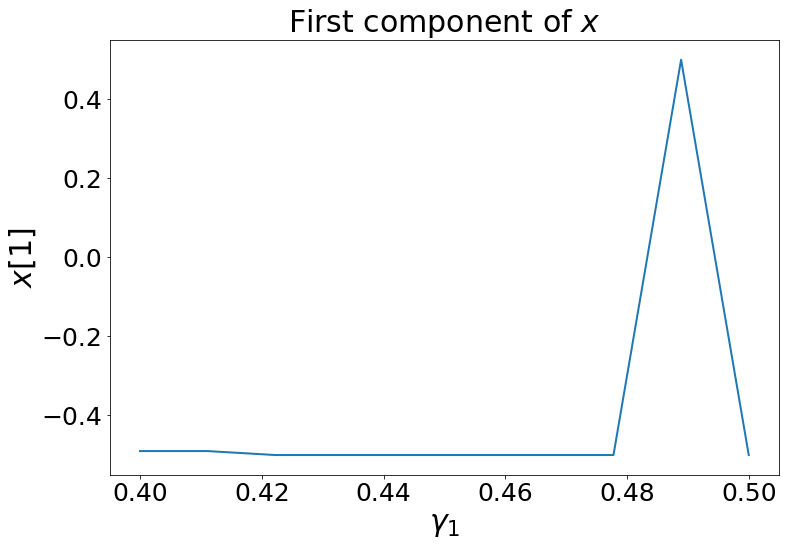

In [11]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $x$", fontsize=30)

plt.plot(gamma1_options, np.round(x_1st_component,2), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$x[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

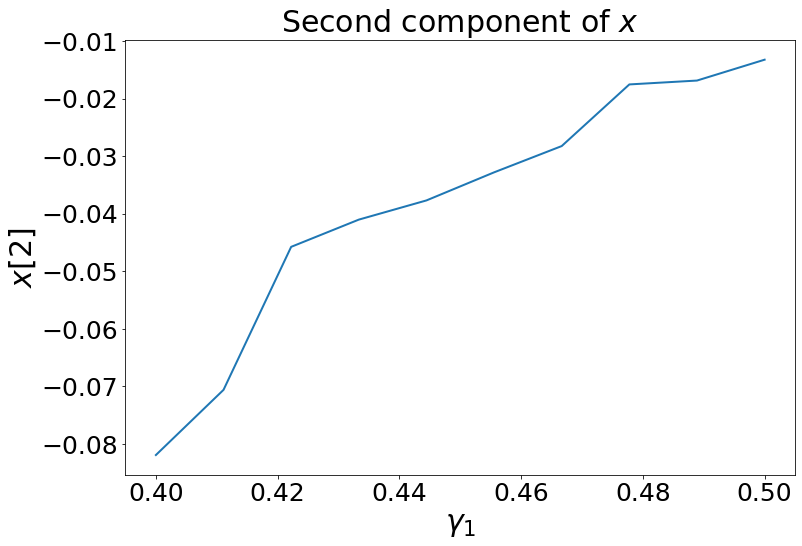

In [12]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $x$", fontsize=30)

plt.plot(gamma1_options, np.round(x_2nd_component,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$x[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

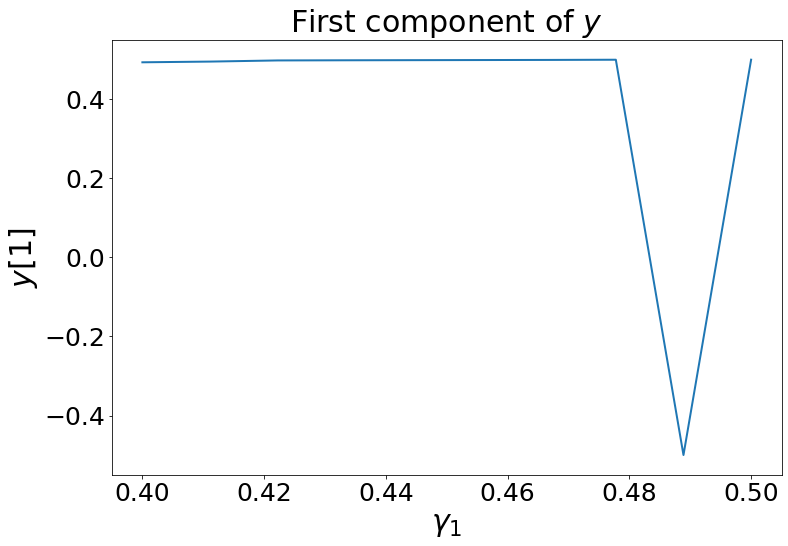

In [13]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $y$", fontsize=30)

plt.plot(gamma1_options, np.round(y_1st_component,4), linewidth=2)

plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$y[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

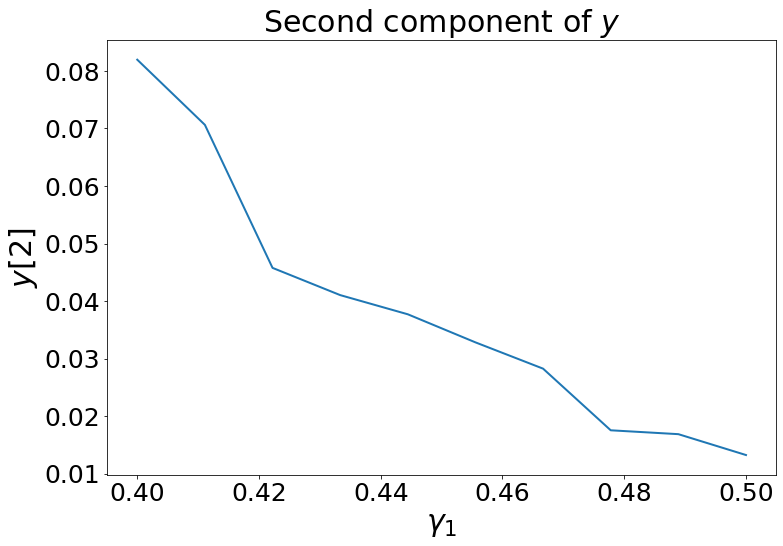

In [14]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $y$", fontsize=30)

plt.plot(gamma1_options, np.round(y_2nd_component,9), linewidth=2)

plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$y[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

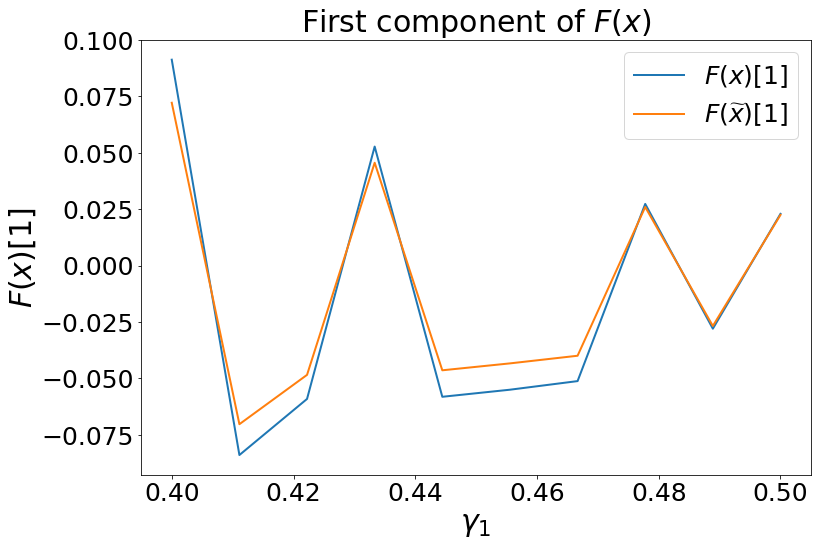

In [15]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(x)$", fontsize=30)

plt.plot(gamma1_options, np.round(xF1_1st_component,9), linewidth=2, label=r"$F(x)[1]$")
plt.plot(gamma1_options, np.round(xF2_1st_component,9), linewidth=2, label=r"$F(\widetilde{x})[1]$")

plt.legend(loc='best', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(x)[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

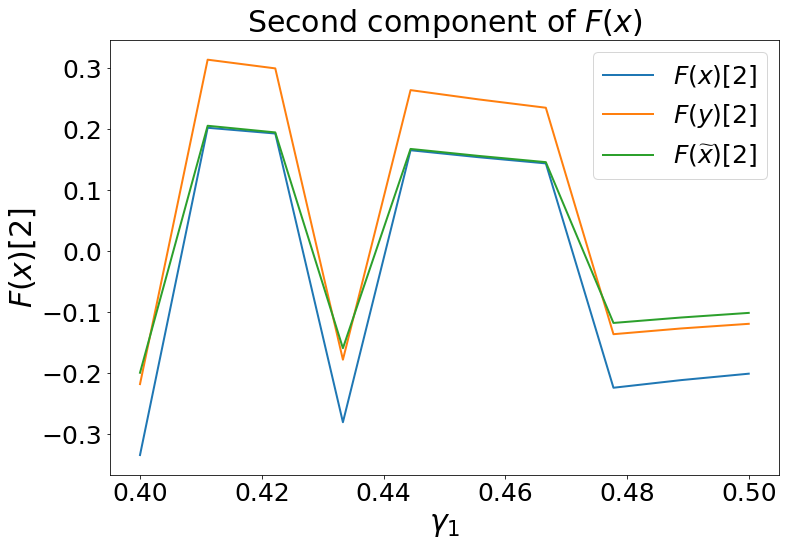

In [16]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(x)$", fontsize=30)

plt.plot(gamma1_options, np.round(xF1_2nd_component,9), linewidth=2, label=r"$F(x)[2]$")
plt.plot(gamma1_options, np.round(yF1_2nd_component,9), linewidth=2, label=r"$F(y)[2]$")
plt.plot(gamma1_options, np.round(xF2_2nd_component,9), linewidth=2, label=r"$F(\widetilde{x})[2]$")


plt.legend(loc='best', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(x)[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

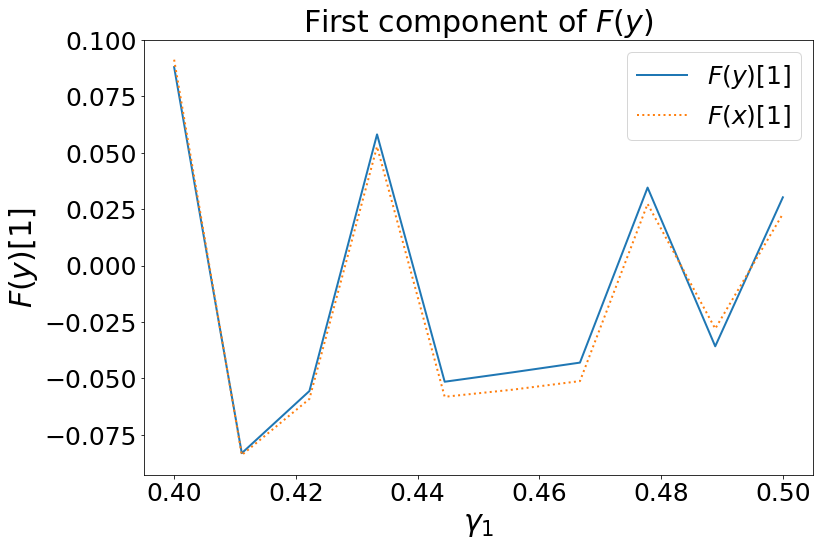

In [17]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(y)$", fontsize=30)

plt.plot(gamma1_options, np.round(yF1_1st_component,9), linewidth=2, label = r"$F(y)[1]$")
plt.plot(gamma1_options, np.round(xF1_1st_component,9), linewidth=2, linestyle='dotted', label = r"$F(x)[1]$")
# plt.plot(gamma1_options, 0.0005/(gamma1_options**3), linewidth=2, label = r"$\frac{0.0005}{\gamma_1^3}$")
# plt.plot(gamma1_options[10:], C_yF1_1*(gamma1_options[10:]**alpha_yF1_1), linewidth=2, label = r"least-squares solution")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(y)[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

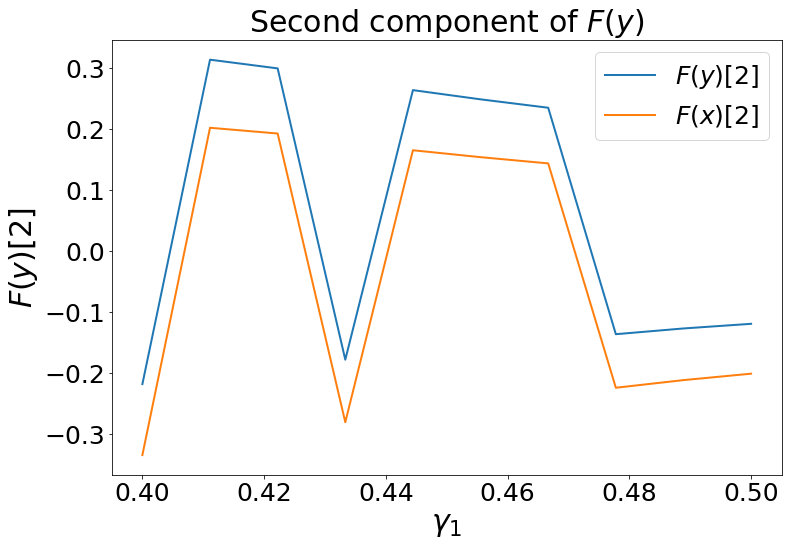

In [18]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(y)$", fontsize=30)

plt.plot(gamma1_options, np.round(yF1_2nd_component,9), linewidth=2, label = r"$F(y)[2]$")
plt.plot(gamma1_options, np.round(xF1_2nd_component,9), linewidth=2, label = r"$F(x)[2]$")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(y)[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

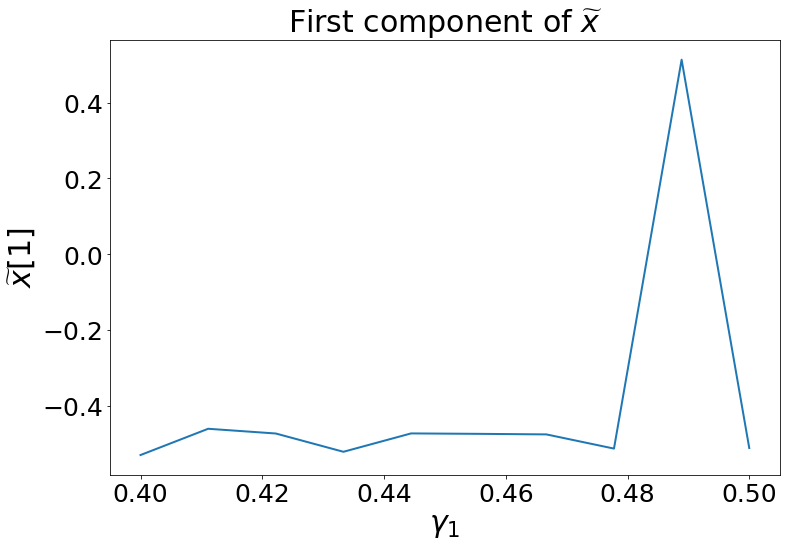

In [19]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $\widetilde{x}$", fontsize=30)

plt.plot(gamma1_options, np.round(tx_1st_component,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$\widetilde{x}[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

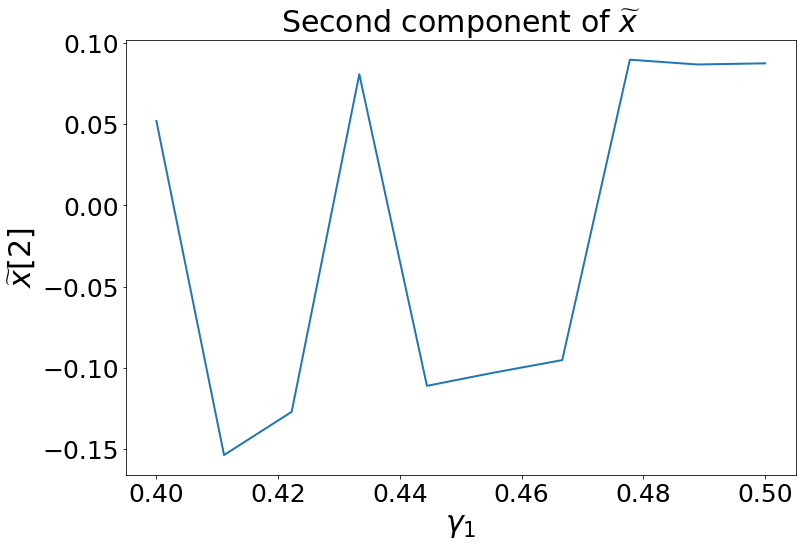

In [20]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $\widetilde{x}$", fontsize=30)

plt.plot(gamma1_options, np.round(tx_2nd_component,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$\widetilde{x}[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

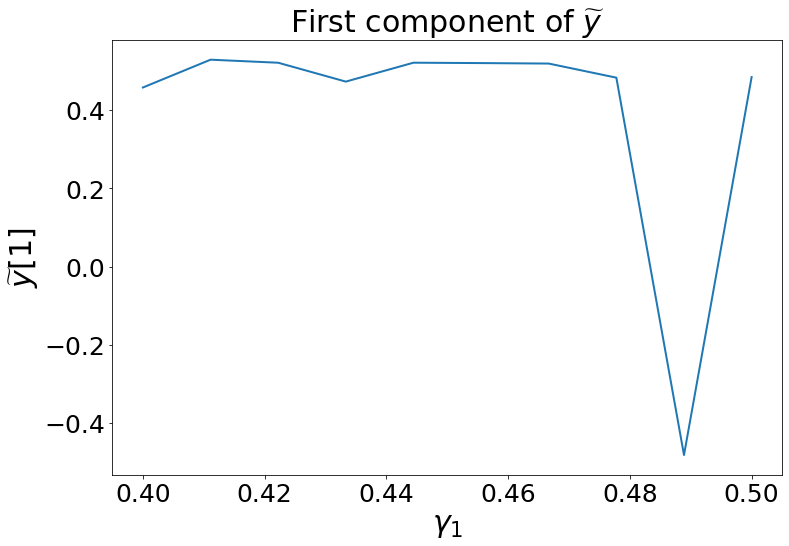

In [21]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $\widetilde{y}$", fontsize=30)

plt.plot(gamma1_options, np.round(ty_1st_component,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$\widetilde{y}[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

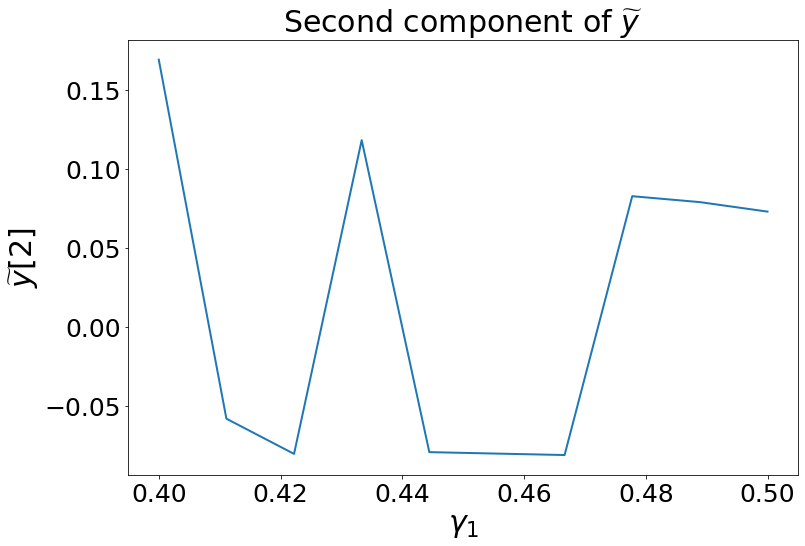

In [22]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $\widetilde{y}$", fontsize=30)

plt.plot(gamma1_options, np.round(ty_2nd_component,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$\widetilde{y}[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

No handles with labels found to put in legend.


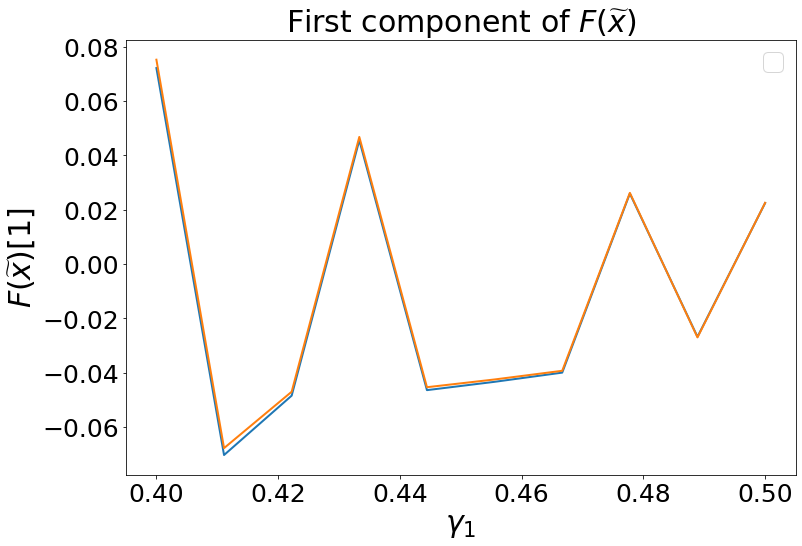

In [23]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(\widetilde{x})$", fontsize=30)

plt.plot(gamma1_options, np.round(xF2_1st_component,9), linewidth=2)
plt.plot(gamma1_options, np.round(yF2_1st_component,9), linewidth=2)
# plt.plot(gamma1_options, 0.0001/(gamma1_options), linewidth=2, label = r"$\frac{0.0001}{\gamma_1}$")
# plt.plot(gamma1_options[10:], C_xF2_1*(gamma1_options[10:]**alpha_xF2_1), linewidth=2, label = r"least-squares solution")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{x})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

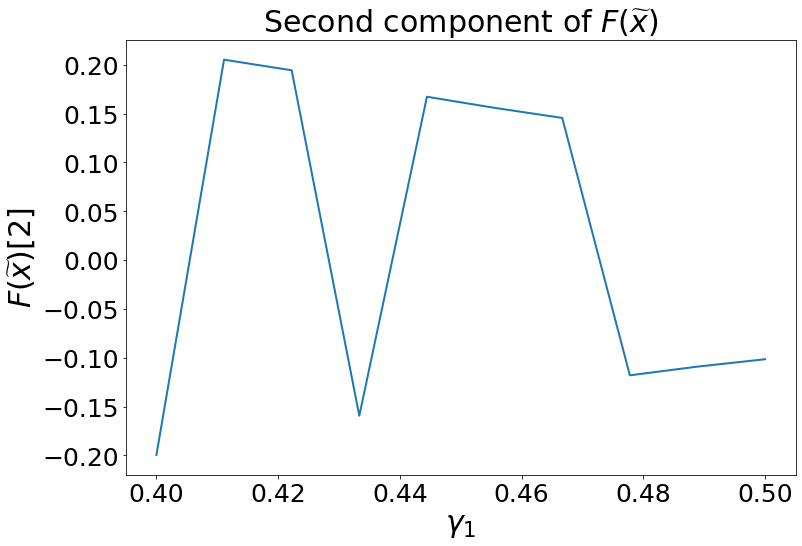

In [24]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(\widetilde{x})$", fontsize=30)

plt.plot(gamma1_options, np.round(xF2_2nd_component,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{x})[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

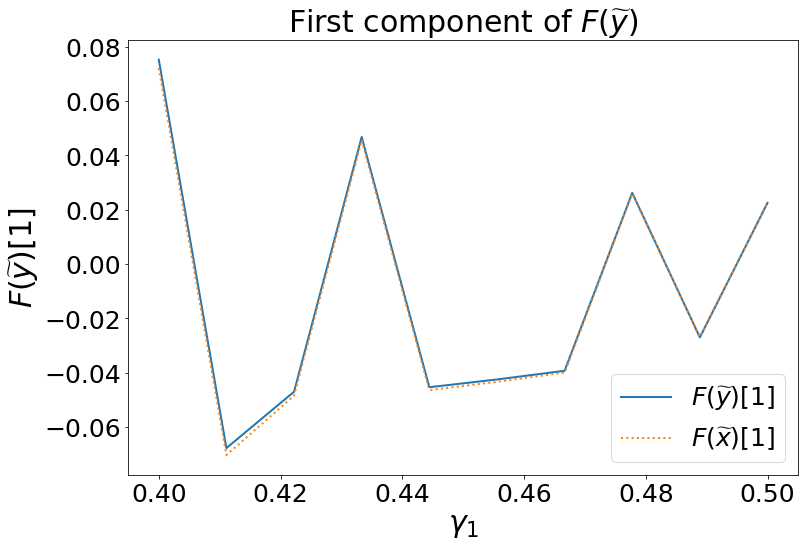

In [25]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(\widetilde{y})$", fontsize=30)

plt.plot(gamma1_options, np.round(yF2_1st_component,9), linewidth=2, label = r"$F(\widetilde{y})[1]$")
plt.plot(gamma1_options, np.round(xF2_1st_component,9), linewidth=2, linestyle='dotted', label = r"$F(\widetilde{x})[1]$")
# plt.plot(gamma1_options, -0.0001/(gamma1_options), linewidth=2, label = r"$-\frac{0.0001}{\gamma_1}$")
# plt.plot(gamma1_options[10:], C_yF2_1*(gamma1_options**alpha_yF2_1)[10:], linewidth=2, label = r"least-squares solution")

plt.legend(loc='lower right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{y})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

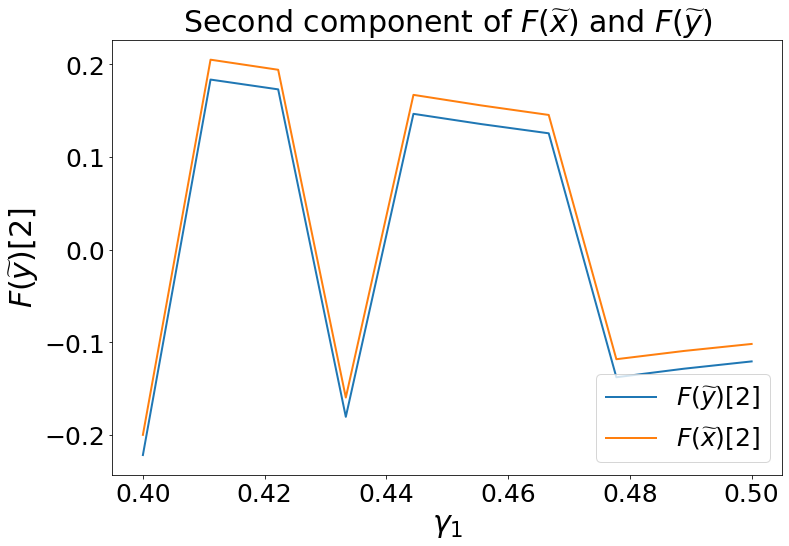

In [26]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(\widetilde{x})$ and $F(\widetilde{y})$", fontsize=30)

plt.plot(gamma1_options, np.round(yF2_2nd_component,9), linewidth=2, label = r"$F(\widetilde{y})[2]$")
plt.plot(gamma1_options, np.round(xF2_2nd_component,9), linewidth=2, label = r"$F(\widetilde{x})[2]$")

plt.legend(loc='lower right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{y})[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

In [27]:
x_1st_component

array([-0.49323875, -0.49498758, -0.49790103, -0.49831327, -0.49857673,
       -0.4989217 , -0.49920123, -0.49969233,  0.49971545, -0.49982471])

In [28]:
x_2nd_component

array([-0.08194838, -0.07062081, -0.04576643, -0.04103519, -0.03769941,
       -0.03281979, -0.02825118, -0.01753792, -0.01686576, -0.0132384 ])

In [29]:
ell1 = 1.0

for idx, gamma in enumerate(gamma1_options):
    x = np.array([x_1st_component[idx], x_2nd_component[idx]])
    y = np.array([y_1st_component[idx], y_2nd_component[idx]])
    
    Fx = np.array([xF1_1st_component[idx], xF1_2nd_component[idx]])
    Fy = np.array([yF1_1st_component[idx], yF1_2nd_component[idx]])
    
    tx = x - gamma * Fx
    ty = y - gamma * Fy
    
    Ftx = np.array([xF2_1st_component[idx], xF2_2nd_component[idx]])
    Fty = np.array([yF2_1st_component[idx], yF2_2nd_component[idx]])
    
    check_x_y = ell1*np.dot(x-y, Fx - Fy) - np.dot(Fx - Fy, Fx - Fy)
    check_x_tx = ell1*np.dot(x-tx, Fx - Ftx) - np.dot(Fx - Ftx, Fx - Ftx)
    check_x_ty = ell1*np.dot(x-ty, Fx - Fty) - np.dot(Fx - Fty, Fx - Fty)
    
    check_y_tx = ell1*np.dot(y-tx, Fy - Ftx) - np.dot(Fy - Ftx, Fy - Ftx)
    check_y_ty = ell1*np.dot(y-ty, Fy - Fty) - np.dot(Fy - Fty, Fy - Fty)
    
    check_tx_ty = ell1*np.dot(tx - ty, Ftx - Fty) - np.dot(Ftx - Fty, Ftx - Fty)
    
    check_norm = np.dot(x - gamma * Ftx - y + gamma * Fty, x - gamma * Ftx - y + gamma * Fty) - 1
       
    if (check_x_y < 0):
        print("===================")
        print("Error occured for pair (x, y), gamma = ", gamma)
        print(check_x_y)
        print("===================")
    
    if (check_x_tx < 0):
        print("===================")
        print("Error occured for pair (x, tx), gamma = ", gamma)
        print(check_x_tx)
        print("===================")
    
    if (check_x_ty < 0):
        print("===================")
        print("Error occured for pair (x, ty), gamma = ", gamma)
        print(check_x_ty)
        print("===================")

    if (check_y_tx < 0):
        print("===================")
        print("Error occured for pair (y, tx), gamma = ", gamma)
        print(check_y_tx)
        print("===================")
        
    if (check_y_ty < 0):
        print("===================")
        print("Error occured for pair (y, ty), gamma = ", gamma)
        print(check_y_ty)
        print("===================")
        
    if (check_tx_ty < 0):
        print("===================")
        print("Error occured for pair (tx, ty), gamma = ", gamma)
        print(check_tx_ty)
        print("===================")
        
    if (check_norm < 0):
        print("===================")
        print("Norm is smaller than 1,           gamma = ", gamma)
        print(check_norm)
        print("===================")        

### The same but for rotated vectors

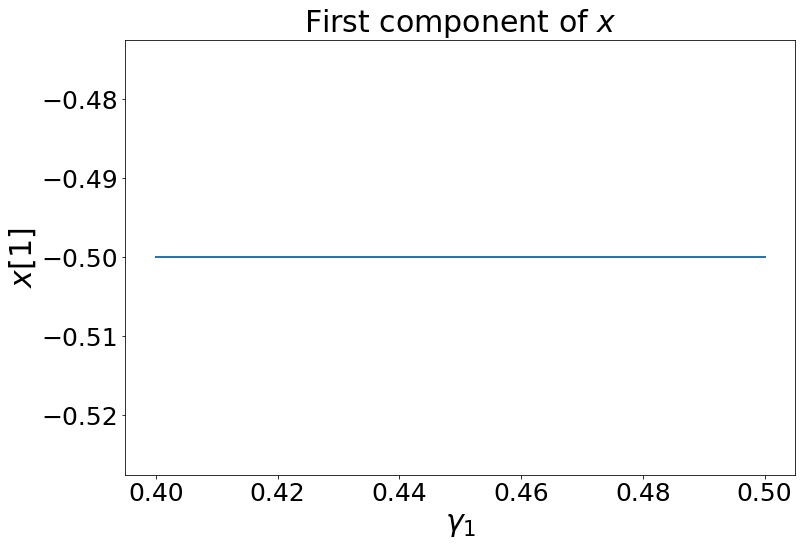

In [30]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $x$", fontsize=30)

plt.plot(gamma1_options, np.round(x_1st_component_rotated,2), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$x[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

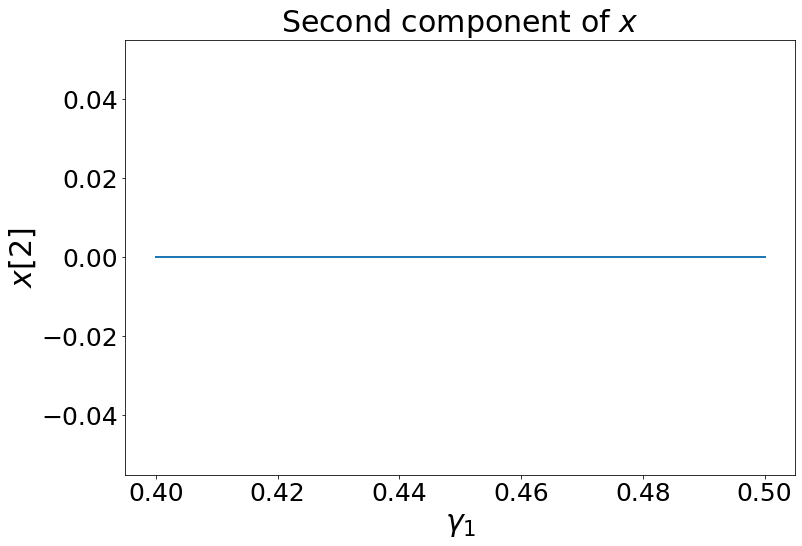

In [31]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $x$", fontsize=30)

plt.plot(gamma1_options, np.round(x_2nd_component_rotated,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$x[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

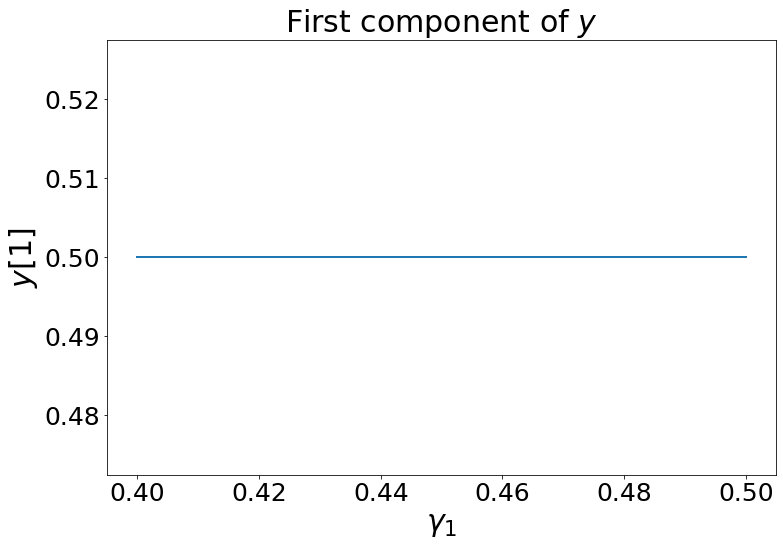

In [32]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $y$", fontsize=30)

plt.plot(gamma1_options, np.round(y_1st_component_rotated,4), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$y[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

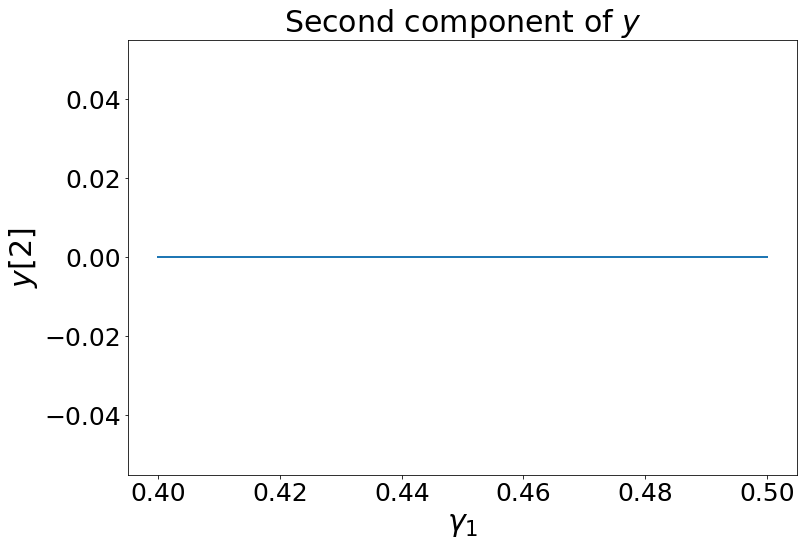

In [33]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $y$", fontsize=30)

plt.plot(gamma1_options, np.round(y_2nd_component_rotated,9), linewidth=2)
# plt.plot(gamma1_options, -np.round(x_2nd_component,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$y[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

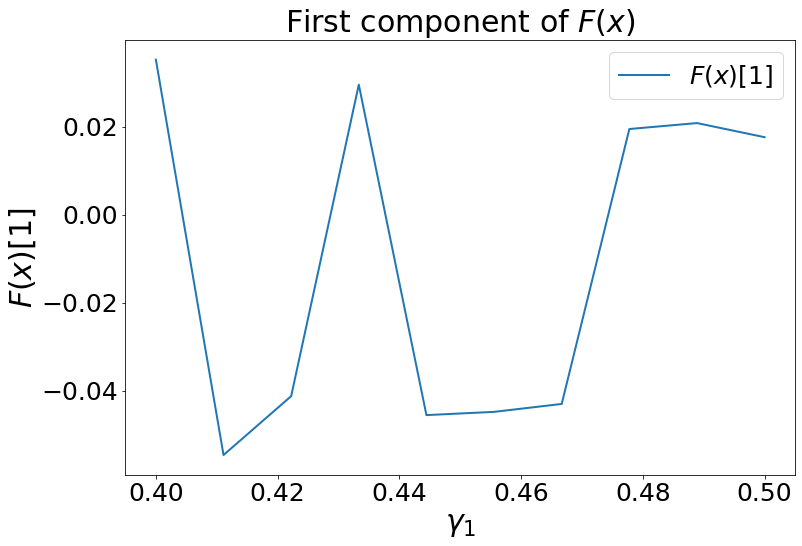

In [34]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(x)$", fontsize=30)

plt.plot(gamma1_options, np.round(xF1_1st_component_rotated,9), linewidth=2, label=r"$F(x)[1]$")

plt.legend(loc='best', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(x)[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

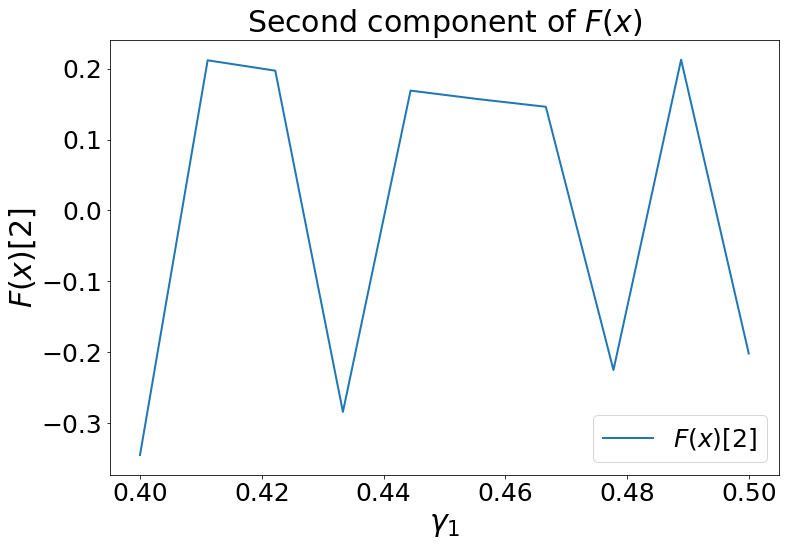

In [35]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(x)$", fontsize=30)

plt.plot(gamma1_options, np.round(xF1_2nd_component_rotated,9), linewidth=2, label=r"$F(x)[2]$")

plt.legend(loc='best', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(x)[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

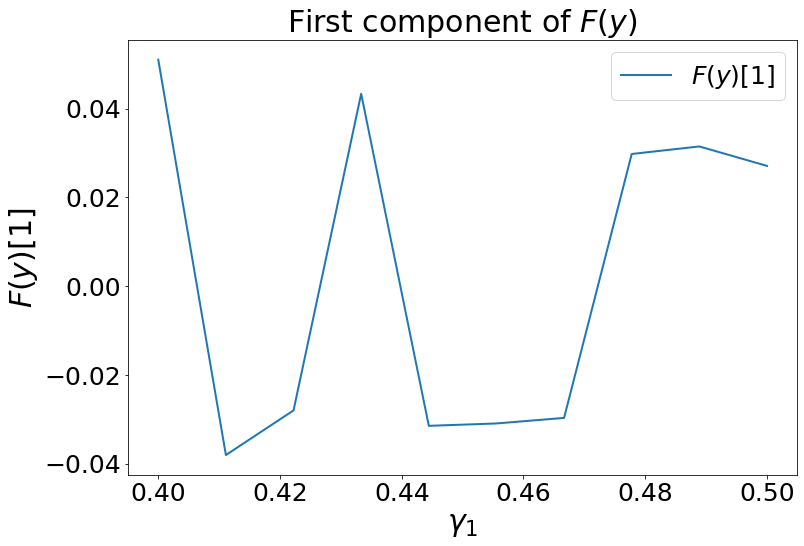

In [36]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(y)$", fontsize=30)

plt.plot(gamma1_options, np.round(yF1_1st_component_rotated,9), linewidth=2, label = r"$F(y)[1]$")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(y)[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

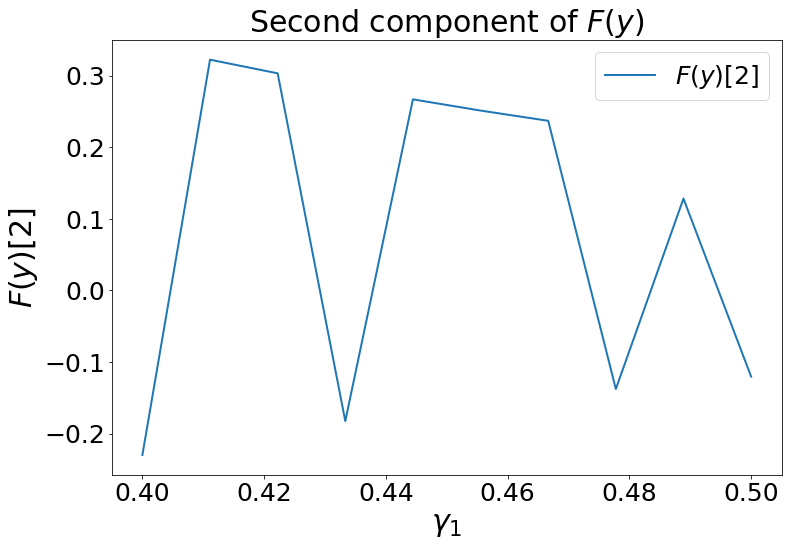

In [37]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(y)$", fontsize=30)

plt.plot(gamma1_options, np.round(yF1_2nd_component_rotated,9), linewidth=2, label = r"$F(y)[2]$")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(y)[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

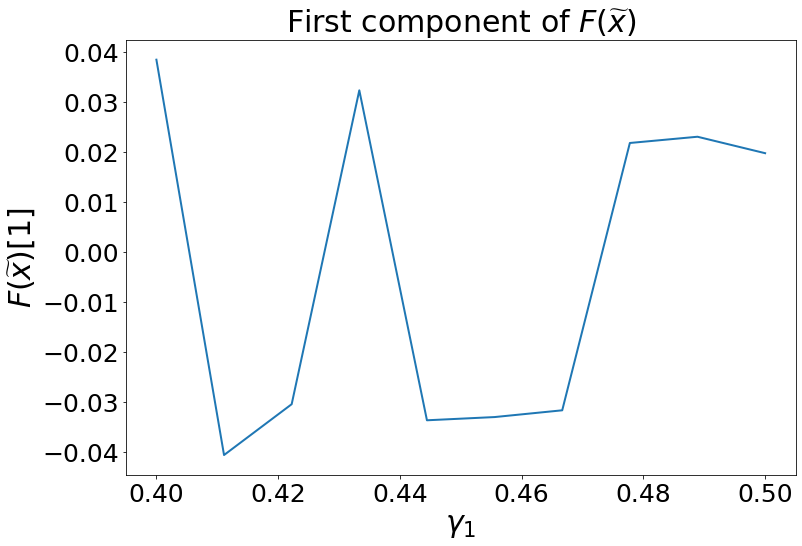

In [38]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(\widetilde{x})$", fontsize=30)

plt.plot(gamma1_options, np.round(xF2_1st_component_rotated,9), linewidth=2)

# plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{x})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

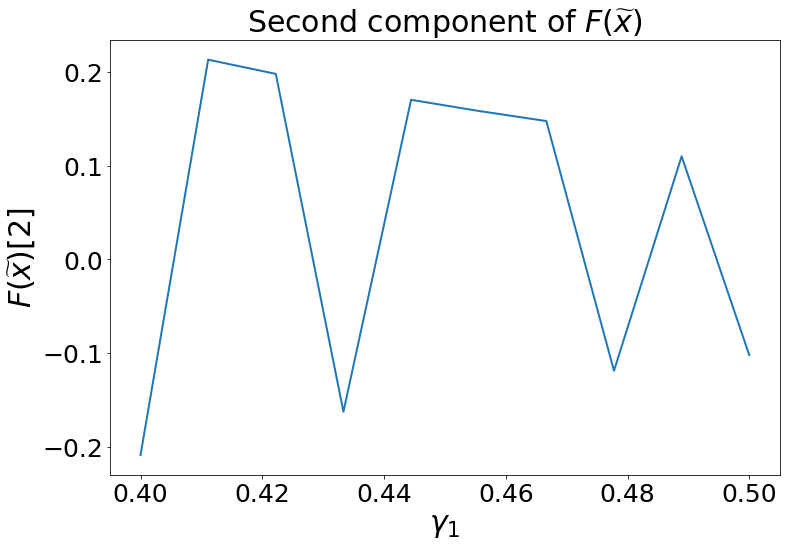

In [39]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(\widetilde{x})$", fontsize=30)

plt.plot(gamma1_options, np.round(xF2_2nd_component_rotated,9), linewidth=2)

# plt.legend(loc='upper left', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{x})[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

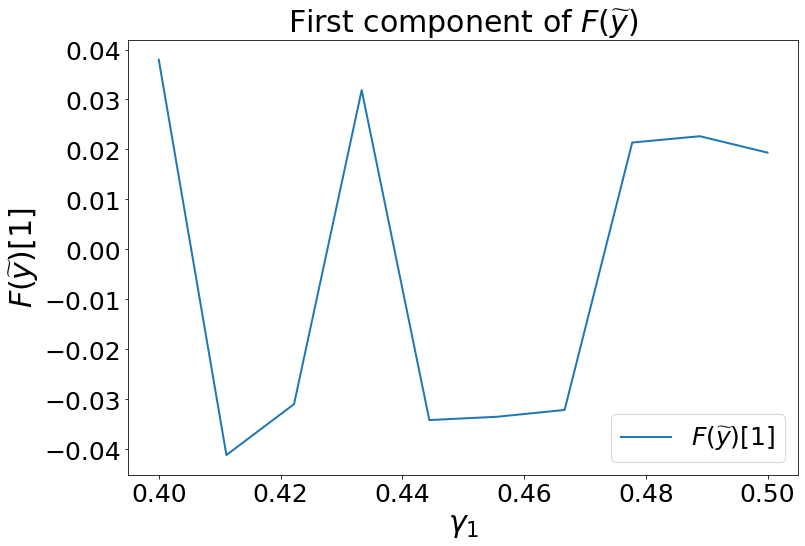

In [40]:
fig = plt.figure(figsize=(12,8))
plt.title(r"First component of $F(\widetilde{y})$", fontsize=30)

plt.plot(gamma1_options, np.round(yF2_1st_component_rotated,9), linewidth=2, label = r"$F(\widetilde{y})[1]$")

plt.legend(loc='lower right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{y})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

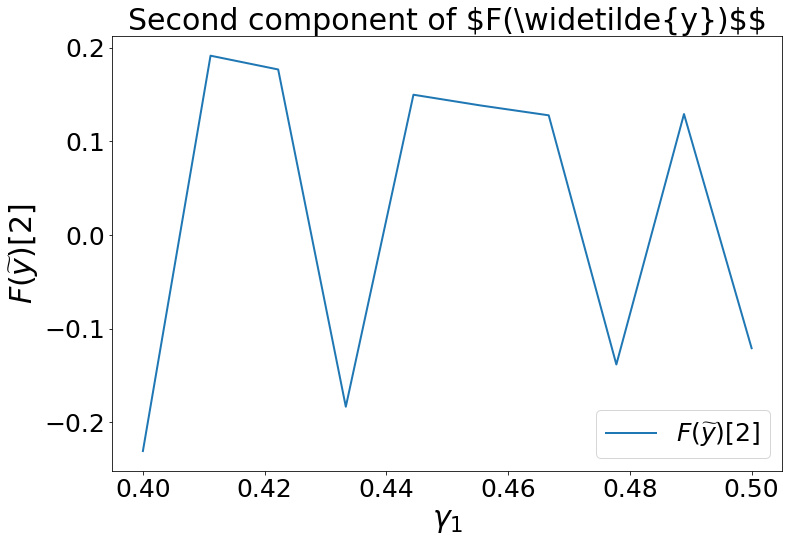

In [41]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Second component of $F(\widetilde{y})$$", fontsize=30)

plt.plot(gamma1_options, np.round(yF2_2nd_component_rotated,9), linewidth=2, label = r"$F(\widetilde{y})[2]$")

plt.legend(loc='lower right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
plt.ylabel(r"$F(\widetilde{y})[2]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

ax = fig.gca()

In [42]:
ell1 = 1.0

for idx, gamma in enumerate(gamma1_options):
    x = np.array([x_1st_component_rotated[idx], x_2nd_component_rotated[idx]])
    y = np.array([y_1st_component_rotated[idx], y_2nd_component_rotated[idx]])
    
    Fx = np.array([xF1_1st_component_rotated[idx], xF1_2nd_component_rotated[idx]])
    Fy = np.array([yF1_1st_component_rotated[idx], yF1_2nd_component_rotated[idx]])
    
    tx = x - gamma * Fx
    ty = y - gamma * Fy
    
    Ftx = np.array([xF2_1st_component_rotated[idx], xF2_2nd_component_rotated[idx]])
    Fty = np.array([yF2_1st_component_rotated[idx], yF2_2nd_component_rotated[idx]])
    
    check_x_y = ell1*np.dot(x-y, Fx - Fy) - np.dot(Fx - Fy, Fx - Fy)
    check_x_tx = ell1*np.dot(x-tx, Fx - Ftx) - np.dot(Fx - Ftx, Fx - Ftx)
    check_x_ty = ell1*np.dot(x-ty, Fx - Fty) - np.dot(Fx - Fty, Fx - Fty)
    
    check_y_tx = ell1*np.dot(y-tx, Fy - Ftx) - np.dot(Fy - Ftx, Fy - Ftx)
    check_y_ty = ell1*np.dot(y-ty, Fy - Fty) - np.dot(Fy - Fty, Fy - Fty)
    
    check_tx_ty = ell1*np.dot(tx - ty, Ftx - Fty) - np.dot(Ftx - Fty, Ftx - Fty)
    
    check_norm = np.dot(x - gamma * Ftx - y + gamma * Fty, x - gamma * Ftx - y + gamma * Fty) - 1
    

    if (check_x_y < 0):
        print("===================")
        print("Error occured for pair (x, y), gamma = ", gamma)
        print(check_x_y)
        print("===================")
    
    if (check_x_tx < 0):
        print("===================")
        print("Error occured for pair (x, tx), gamma = ", gamma)
        print(check_x_tx)
        print("===================")
    
    if (check_x_ty < 0):
        print("===================")
        print("Error occured for pair (x, ty), gamma = ", gamma)
        print(check_x_ty)
        print("===================")

    if (check_y_tx < 0):
        print("===================")
        print("Error occured for pair (y, tx), gamma = ", gamma)
        print(check_y_tx)
        print("===================")
        
    if (check_y_ty < 0):
        print("===================")
        print("Error occured for pair (y, ty), gamma = ", gamma)
        print(check_y_ty)
        print("===================")
        
    if (check_tx_ty < 0):
        print("===================")
        print("Error occured for pair (tx, ty), gamma = ", gamma)
        print(check_tx_ty)
        print("===================")
        
    if (check_norm < 0):
        print("===================")
        print("Norm is smaller than 1,           gamma = ", gamma)
        print(check_norm)
        print("===================")
        
#     pairs = [[x, Fx], [y, Fy], [tx, Ftx], [ty, Fty]]
    
#     for pair1 in pairs:
#         for pair2 in pairs:
            

## Let us try to guess some relations

### Observation 0: we alsways have

$$
x = \begin{pmatrix} - \frac{1}{2} \\ 0 \end{pmatrix},\quad y = \begin{pmatrix} \frac{1}{2} \\ 0 \end{pmatrix}
$$

### Observation 1: $F(\widetilde{x})[1] \approx F(\widetilde{y})[1]$

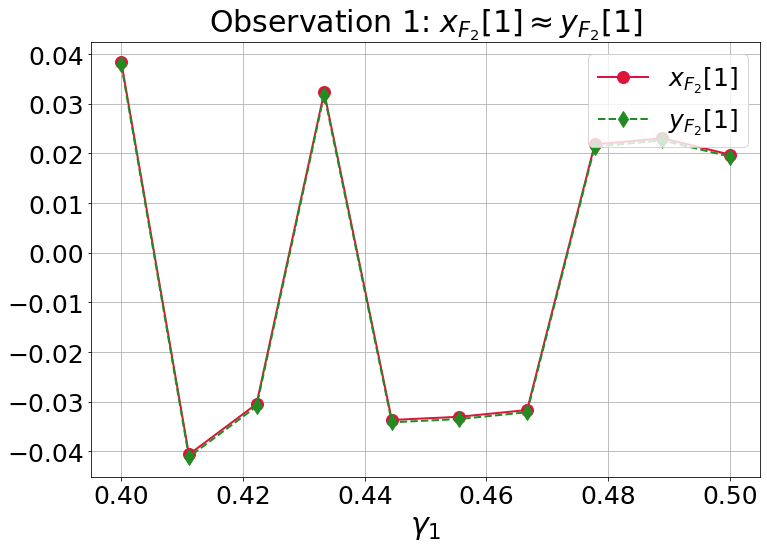

In [63]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Observation 1: $x_{F_2}[1] \approx y_{F_2}[1]$", fontsize=30)

plt.plot(gamma1_options, np.round(xF2_1st_component_rotated,9), linewidth=2, markersize = 12, marker = "o",
             markevery=range(0, 10, 1), color="crimson",
         label=r"$x_{F_2}[1]$")
plt.plot(gamma1_options, np.round(yF2_1st_component_rotated,9), linewidth=2, linestyle='dashed', 
             markersize = 12, marker = "d",
             markevery=range(0, 10, 1), color="forestgreen",
         label=r"$y_{F_2}[1]$")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
# plt.ylabel(r"$F(\widetilde{x})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

plt.savefig("plot/EG_observation_1.pdf", bbox_inches='tight')

Let us assume that $F(\widetilde{x})[1] = F(\widetilde{y})[1]$

### Observation 2: $F(y)[1] \approx F(\widetilde{x})[1]$ when $F(y)[1] < 0$ and $F(x)[1] < F(y)[1]$

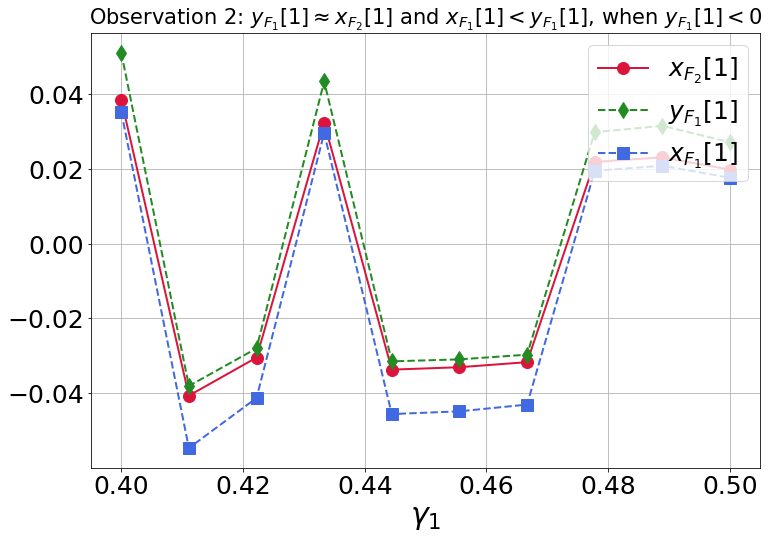

In [71]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Observation 2: $y_{F_1}[1] \approx x_{F_2}[1]$ and $x_{F_1}[1] < y_{F_1}[1]$, when $y_{F_1}[1] < 0$", fontsize=21)

plt.plot(gamma1_options, np.round(xF2_1st_component_rotated,9), linewidth=2, markersize = 12, marker = "o",
             markevery=range(0, 10, 1), color="crimson", label=r"$x_{F_2}[1]$")
plt.plot(gamma1_options, np.round(yF1_1st_component_rotated,9), linewidth=2, linestyle='dashed',
         markersize = 12, marker = "d",
             markevery=range(0, 10, 1), color="forestgreen", label=r"$y_{F_1}[1]$")
plt.plot(gamma1_options, np.round(xF1_1st_component_rotated,9), linewidth=2, linestyle='dashed',
         markersize = 12, marker = "s",
             markevery=range(0, 10, 1), color="royalblue", label=r"$x_{F_1}[1]$")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
# plt.ylabel(r"$F(\widetilde{x})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

plt.savefig("plot/EG_observation_2.pdf", bbox_inches='tight')

Let us assume $F(y)[1] = F(\widetilde{x})[1]$ and $F(x)[1] < F(y)[1] < 0$

### Observation 3: $F(x)[2] < F(y)[2]$ (in almost all cases)

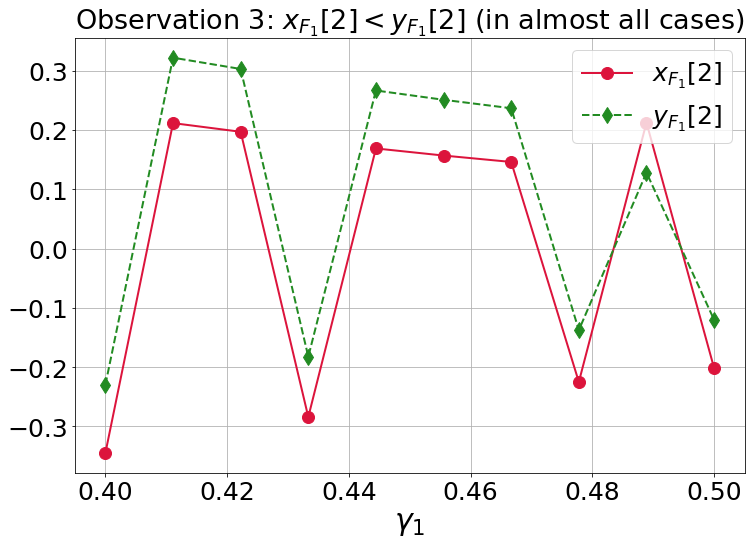

In [72]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Observation 3: $x_{F_1}[2] < y_{F_1}[2]$ (in almost all cases)", fontsize=27)

plt.plot(gamma1_options, np.round(xF1_2nd_component_rotated,9), linewidth=2, markersize = 12, marker = "o",
             markevery=range(0, 10, 1), color="crimson", label=r"$x_{F_1}[2]$")
plt.plot(gamma1_options, np.round(yF1_2nd_component_rotated,9), linewidth=2, linestyle='dashed', 
         markersize = 12, marker = "d",
             markevery=range(0, 10, 1), color="forestgreen", label=r"$y_{F_1}[2]$")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
# plt.ylabel(r"$F(\widetilde{x})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

plt.savefig("plot/EG_observation_3.pdf", bbox_inches='tight')

Let us assume $0 < F(x)[2] < F(y)[2]$

### Observation 4: $F(x)[2] \approx F(\widetilde{x})[2]$ when $F(x)[2] > 0$ (in almost all cases)

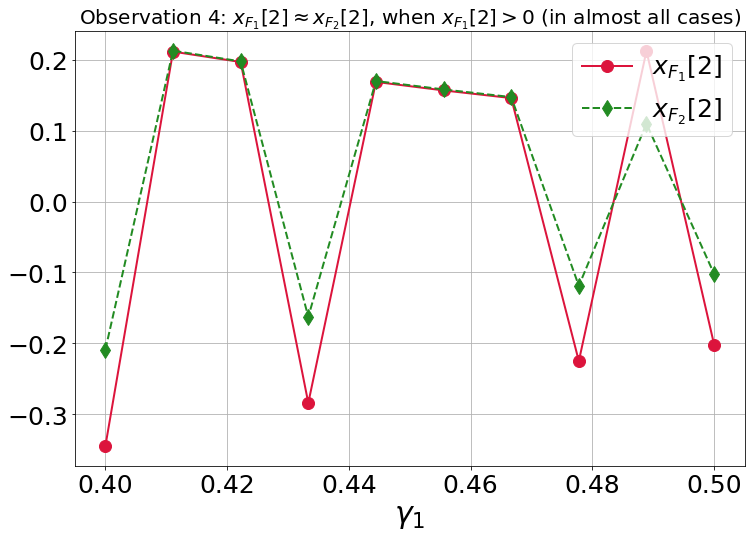

In [79]:
fig = plt.figure(figsize=(12,8))
plt.title(r"Observation 4: $x_{F_1}[2] \approx x_{F_2}[2]$, when $x_{F_1}[2] > 0$ (in almost all cases)", fontsize=20)

plt.plot(gamma1_options, np.round(xF1_2nd_component_rotated,9), linewidth=2, markersize = 12, marker = "o",
             markevery=range(0, 10, 1), color="crimson", label=r"$x_{F_1}[2]$")
plt.plot(gamma1_options, np.round(xF2_2nd_component_rotated,9), linewidth=2, linestyle='dashed', 
         markersize = 12, marker = "d",
             markevery=range(0, 10, 1), color="forestgreen", label=r"$x_{F_2}[2]$")

plt.legend(loc='upper right', fontsize=25)
plt.xlabel(r"$\gamma_1$", fontsize=30)
# plt.ylabel(r"$F(\widetilde{x})[1]$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)
plt.grid()

plt.savefig("plot/EG_observation_4.pdf", bbox_inches='tight')

Let us assume $F(x)[2] = F(\widetilde{x})[2]$

### After that, we just put these relations in the interpolation conditions, simplified them, and got:

$$F(y)[1] \leq (1 - \gamma)F(x)[1]$$
$$F(y)[2] \leq \frac{F(\widetilde{y})[2]}{1-\gamma}$$
$$F(y)[2] \leq (1+\gamma)F(\widetilde{x})[2]$$
$$F(\widetilde{x})[2] \leq \frac{F(\widetilde{y})[2]}{1-\gamma^2}$$

### Therefore, we made another guess

$$F(\widetilde{x})[2] = F(x)[2] = \frac{F(\widetilde{y})[2]}{1-\gamma^2},\quad F(y)[2] = \frac{F(\widetilde{y})[2]}{1-\gamma},\quad F(y)[1] = F(\widetilde{x})[1] = F(\widetilde{y})[1] = (1 - \gamma)F(x)[1]$$

### Next, we put new relations in the remaining interpolation conditions and obtained the following inequality:

$$F(x)[1] + \gamma (F(x)[1])^2 + \frac{\gamma (F(\widetilde{y})[2])^2}{(1-\gamma^2)^2} \leq 0$$

### After that, we assumed that

$$F(\widetilde{y})[2] = - F(x)[1](1-\gamma^2)$$

### and got

$$F(x)[1] + 2\gamma (F(x)[1])^2 \leq 0$$

### Finally, we chose

$$F(x)[1] = - \frac{1}{2\gamma}$$

# Check the example inspired by numerical solution

Guided by numerical inspiration we observed that the example showing expansiveness of EG has the following form:
$$
x = \begin{pmatrix} - \frac{1}{2} \\ 0 \end{pmatrix},\quad y = \begin{pmatrix} \frac{1}{2} \\ 0 \end{pmatrix}, \quad F(x) = \begin{pmatrix} - \frac{1}{2\gamma} \\ \frac{1}{2\gamma} \end{pmatrix}, \quad F(y) = \begin{pmatrix} -\frac{1-\gamma}{2\gamma} \\ \frac{1+\gamma}{2\gamma} \end{pmatrix},
$$
$$
F(\widetilde{x}) = \begin{pmatrix} -\frac{1-\gamma}{2\gamma} \\ \frac{1}{2\gamma} \end{pmatrix}, \quad F(\widetilde{y}) = \begin{pmatrix} -\frac{1-\gamma}{2\gamma} \\ \frac{1-\gamma^2}{2\gamma} \end{pmatrix}.
$$
Let us check that interpolation conditions hold.

In [145]:
ell = 1.0
gamma_options = np.linspace(1.0/(10*ell), 0.5/ell, 100)

x = np.array([-0.5, 0.0])
y = np.array([0.5, 0.0])

for gamma in gamma_options:
    Fx = np.array([-1.0 / (2*gamma), 1.0 / (2*gamma)])
    Fy = np.array([- (1.0 - gamma) / (2*gamma), (1.0 + gamma) / (2*gamma)])
    
    tx = x - gamma * Fx
    ty = y - gamma * Fy
    
    Ftx = np.array([- (1.0 - gamma) / (2*gamma), 1 / (2*gamma)])
    Fty = np.array([- (1.0 - gamma) / (2*gamma), (1.0 - gamma**2) / (2*gamma)])
    
    check_x_y = ell*np.dot(x-y, Fx - Fy) - np.dot(Fx - Fy, Fx - Fy)
    check_x_tx = ell*np.dot(x-tx, Fx - Ftx) - np.dot(Fx - Ftx, Fx - Ftx)
    check_x_ty = ell*np.dot(x-ty, Fx - Fty) - np.dot(Fx - Fty, Fx - Fty)
    
    check_y_tx = ell*np.dot(y-tx, Fy - Ftx) - np.dot(Fy - Ftx, Fy - Ftx)
    check_y_ty = ell*np.dot(y-ty, Fy - Fty) - np.dot(Fy - Fty, Fy - Fty)
    
    check_tx_ty = ell*np.dot(tx - ty, Ftx - Fty) - np.dot(Ftx - Fty, Ftx - Fty)
    
    check_norm = np.dot(x - gamma * Ftx - y + gamma * Fty, x - gamma * Ftx - y + gamma * Fty) - 1
    
#     print("===================")
#     print("gamma = ", gamma)
#     print("check_x_y, check_x_tx, check_x_ty, check_y_tx, check_y_ty, check_tx_ty") 
#     print(check_x_y, check_x_tx, check_x_ty, check_y_tx, check_y_ty, check_tx_ty)
#     print("===================")
    
    if (check_x_y < 0):
        print("===================")
        print("Error occured for pair (x, y), gamma = ", gamma)
        print(check_x_y)
        print("===================")
    
    if (check_x_tx < 0):
        print("===================")
        print("Error occured for pair (x, tx), gamma = ", gamma)
        print(check_x_tx)
        print("===================")
    
    if (check_x_ty < 0):
        print("===================")
        print("Error occured for pair (x, ty), gamma = ", gamma)
        print(check_x_ty)
        print("===================")

    if (check_y_tx < 0):
        print("===================")
        print("Error occured for pair (y, tx), gamma = ", gamma)
        print(check_y_tx)
        print("===================")
        
    if (check_y_ty < 0):
        print("===================")
        print("Error occured for pair (y, ty), gamma = ", gamma)
        print(check_y_ty)
        print("===================")
        
    if (check_tx_ty < 0):
        print("===================")
        print("Error occured for pair (tx, ty), gamma = ", gamma)
        print(check_tx_ty)
        print("===================")
        
    if (check_norm < 0):
        print("===================")
        print("Norm is smaller than 1,           gamma = ", gamma)
        print(check_norm)
        print("===================")
        
#     pairs = [[x, Fx], [y, Fy], [tx, Ftx], [ty, Fty]]
    
#     for pair1 in pairs:
#         for pair2 in pairs:
            

Error occured for pair (y, ty), gamma =  0.1
-3.3306690738754696e-16
Error occured for pair (tx, ty), gamma =  0.1
-3.3393426912553537e-17
Error occured for pair (y, ty), gamma =  0.10808080808080808
-1.6653345369377348e-16
Error occured for pair (tx, ty), gamma =  0.10808080808080808
-1.8214596497756474e-17
Error occured for pair (tx, ty), gamma =  0.11212121212121212
-3.0791341698588326e-17
Error occured for pair (x, tx), gamma =  0.11616161616161616
-2.220446049250313e-16
Error occured for pair (y, ty), gamma =  0.1202020202020202
-1.1102230246251565e-16
Error occured for pair (tx, ty), gamma =  0.1202020202020202
-6.5052130349130266e-18
Error occured for pair (x, tx), gamma =  0.12424242424242425
-2.220446049250313e-16
Error occured for pair (y, ty), gamma =  0.12424242424242425
-1.6653345369377348e-16
Error occured for pair (tx, ty), gamma =  0.12424242424242425
-2.0816681711721685e-17
Error occured for pair (y, ty), gamma =  0.12828282828282828
-5.551115123125783e-17
Error occure

The error is negligible, so, numerically we do not see any contradictions. Rigorous methematical proof is given in the paper.